# Polynomial Regression

In [1]:
# importing standard libraries for DS and Ml
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# reading dataset
data = pd.read_csv('Position_Salaries.csv')
data.columns

Index(['Position', 'Level', 'Salary'], dtype='object')

In [6]:
# identifying target and feature variables
X = data[['Level']].values
y = data['Salary'].values

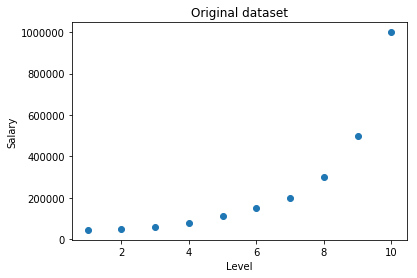

In [7]:
# initial plot
plt.scatter(X,y)
plt.title('Original dataset')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [8]:
# some statistical info
data.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


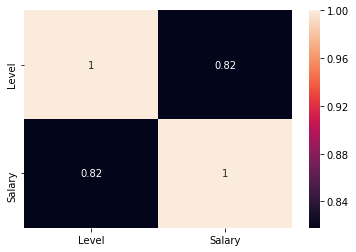

In [9]:
# generating heatmap based on correlation between variables
sns.heatmap(data.corr(),annot=True)

In [18]:
# creating a model and fitting the data
from sklearn.linear_model import LinearRegression
pr = LinearRegression()
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=4)
X_poly = pf.fit_transform(X)
pr.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
# making prediction
pred = pr.predict(pf.fit_transform(X))
pred

array([ 53356.64335681,  31759.90675996,  58642.19114221,  94632.86713289,
       121724.94172498, 143275.05827508, 184003.49650349, 289994.17249411,
       528694.63869452, 988916.08391594])

In [24]:
# calculating intercept
pr.intercept_

184166.6666670672

In [25]:
# calculating coefficients
pr.coef_

array([      0.        , -211002.33100266,   94765.44289054,
        -15463.2867133 ,     890.15151515])

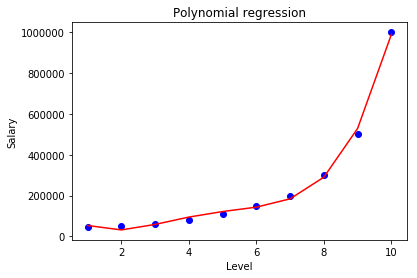

In [20]:
# visualizing polynomial regression
plt.scatter(X,y,color='blue')
plt.plot(X,pr.predict(pf.fit_transform(X)),color='red')
plt.title('Polynomial regression')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [31]:
# calculating MAE
from sklearn import metrics
metrics.mean_absolute_error(X,y)

249494.5

In [32]:
# calculating MSE
metrics.mean_squared_error(X,y)

142908421038.5

In [33]:
# calculating RMSE
np.sqrt(metrics.mean_squared_error(X,y))

378032.30158083054